### Model Calibration

Model calibration measures how well a model’s prediction probabilities match its actual performance. A model that gives a 70% probability score should be correct 70% of the time for similar predictions. This means its probability scores should reflect the true likelihood of its predictions being correct.

While accuracy tells us how often a model is correct overall, calibration tells us whether we can trust its probability scores. Two models might both have 90% accuracy, but one might give realistic probability scores while the other gives overly confident predictions. In many real applications, having reliable probability scores is just as important as having correct predictions.

#### Perfect Calibration vs. Reality

A perfectly calibrated model would show a direct match between its prediction probabilities and actual success rates: When it predicts with 90% probability, it should be correct 90% of the time. The same applies to all probability levels.

However, most models aren't perfectly calibrated. They can be:

- Overconfident: giving probability scores that are too high for their actual performance
- Underconfident: giving probability scores that are too low for their actual performance
- Both: overconfident in some ranges and underconfident in others

This mismatch between predicted probabilities and actual correctness can lead to poor decision-making when using these models in real applications.

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Create and prepare dataset
dataset_dict = {
    'Outlook': ['sunny', 'sunny', 'overcast', 'rainy', 'rainy', 'rainy', 'overcast', 
                'sunny', 'sunny', 'rainy', 'sunny', 'overcast', 'overcast', 'rainy',
                'sunny', 'overcast', 'rainy', 'sunny', 'sunny', 'rainy', 'overcast',
                'rainy', 'sunny', 'overcast', 'sunny', 'overcast', 'rainy', 'overcast'],
    'Temperature': [85.0, 80.0, 83.0, 70.0, 68.0, 65.0, 64.0, 72.0, 69.0, 75.0, 75.0,
                   72.0, 81.0, 71.0, 81.0, 74.0, 76.0, 78.0, 82.0, 67.0, 85.0, 73.0,
                   88.0, 77.0, 79.0, 80.0, 66.0, 84.0],
    'Humidity': [85.0, 90.0, 78.0, 96.0, 80.0, 70.0, 65.0, 95.0, 70.0, 80.0, 70.0,
                 90.0, 75.0, 80.0, 88.0, 92.0, 85.0, 75.0, 92.0, 90.0, 85.0, 88.0,
                 65.0, 70.0, 60.0, 95.0, 70.0, 78.0],
    'Wind': [False, True, False, False, False, True, True, False, False, False, True,
             True, False, True, True, False, False, True, False, True, True, False,
             True, False, False, True, False, False],
    'Play': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes',
             'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'Yes',
             'Yes', 'Yes', 'Yes', 'Yes', 'No', 'Yes']
}
# Prepare data
df = pd.DataFrame(dataset_dict)

In [2]:
from sklearn.preprocessing import StandardScaler
df = pd.get_dummies(df, columns=['Outlook'], prefix='', prefix_sep='', dtype=int)
df['Wind'] = df['Wind'].astype(int)
df['Play'] = (df['Play'] == 'Yes').astype(int)

# Rearrange columns
column_order = ['sunny', 'overcast', 'rainy', 'Temperature', 'Humidity', 'Wind', 'Play']
df = df[column_order]

# Prepare features and target
X,y = df.drop('Play', axis=1), df['Play']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5, shuffle=False)

# Scale numerical features
scaler = StandardScaler()
X_train[['Temperature', 'Humidity']] = scaler.fit_transform(X_train[['Temperature', 'Humidity']])
X_test[['Temperature', 'Humidity']] = scaler.transform(X_test[['Temperature', 'Humidity']])

In [3]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import BernoulliNB

# Initialize the models with the found parameters
knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
bnb = BernoulliNB()
lr = LogisticRegression(C=1, random_state=42)
mlp = MLPClassifier(hidden_layer_sizes=(4, 2),random_state=42, max_iter=2000)

# Train all models
models = {
    'KNN': knn,
    'BNB': bnb,
    'LR': lr,
    'MLP': mlp
}

for name, model in models.items():
    model.fit(X_train, y_train)

# Create predictions and probabilities for each model
results_dict = {
    'True Labels': y_test
}

for name, model in models.items():
#    results_dict[f'{name} Pred'] = model.predict(X_test)
    results_dict[f'{name} Prob'] = model.predict_proba(X_test)[:, 1]

# Create results dataframe
results_df = pd.DataFrame(results_dict)

# Print predictions and probabilities
print("\nPredictions and Probabilities:")
print(results_df)

# Print accuracies
print("\nAccuracies:")
for name, model in models.items():
    accuracy = accuracy_score(y_test, model.predict(X_test))
    print(f"{name}: {accuracy:.3f}")


Predictions and Probabilities:
    True Labels  KNN Prob  BNB Prob   LR Prob  MLP Prob
14            0  0.087983  0.163961  0.311983  0.203405
15            1  0.755463  0.890533  0.770652  0.998456
16            1  0.815945  0.553502  0.623501  0.951761
17            0  0.802458  0.410830  0.477097  0.730744
18            0  0.153188  0.313943  0.417287  0.203405
19            0  0.719434  0.323479  0.469408  0.442462
20            1  0.547838  0.777110  0.627348  0.891572
21            1  0.801977  0.527340  0.612576  0.960725
22            1  0.760212  0.410830  0.515645  0.998462
23            1  1.000000  0.966583  0.895062  0.999993
24            1  1.000000  0.619343  0.777389  0.999988
25            1  0.516312  0.777110  0.552495  0.963026
26            0  0.497872  0.798666  0.819795  0.989917
27            1  0.932254  0.966583  0.825295  0.999849

Accuracies:
KNN: 0.857
BNB: 0.857
LR: 0.929
MLP: 0.857


#### Brier Score
The **Brier Score** measures the mean squared difference between predicted probabilities and actual outcomes. It ranges from 0 to 1, where lower scores indicate better calibration. This score is particularly useful because it considers both calibration and accuracy together.

#### Log Loss
**Log Loss** calculates the negative log probability of correct predictions. This metric is especially sensitive to confident but wrong predictions — when a model says it’s 90% sure but is wrong, it receives a much larger penalty than when it’s 60% sure and wrong. Lower values indicate better calibration.

#### Expected Calibration Error (ECE)
**ECE** measures the average difference between predicted and actual probabilities (taken as average of the label), weighted by how many predictions fall into each probability group. This metric helps us understand if our model has systematic biases in its probability estimates.

#### Reliability Diagrams
Similar to ECE, a reliability diagram (or calibration curve) visualizes model calibration by binning predictions and comparing them to actual outcomes. While ECE gives us a single number measuring calibration error, the reliability diagram shows us the same information graphically.

#### Comparing Calibration Metrics

Each of these metrics shows different aspects of calibration problems:

- A high Brier Score suggests overall poor probability estimates.
- High Log Loss points to overconfident wrong predictions.
- A high ECE indicates systematic bias in probability estimates.

Together, these metrics give us a complete picture of how well our model’s probability scores reflect its true performance.

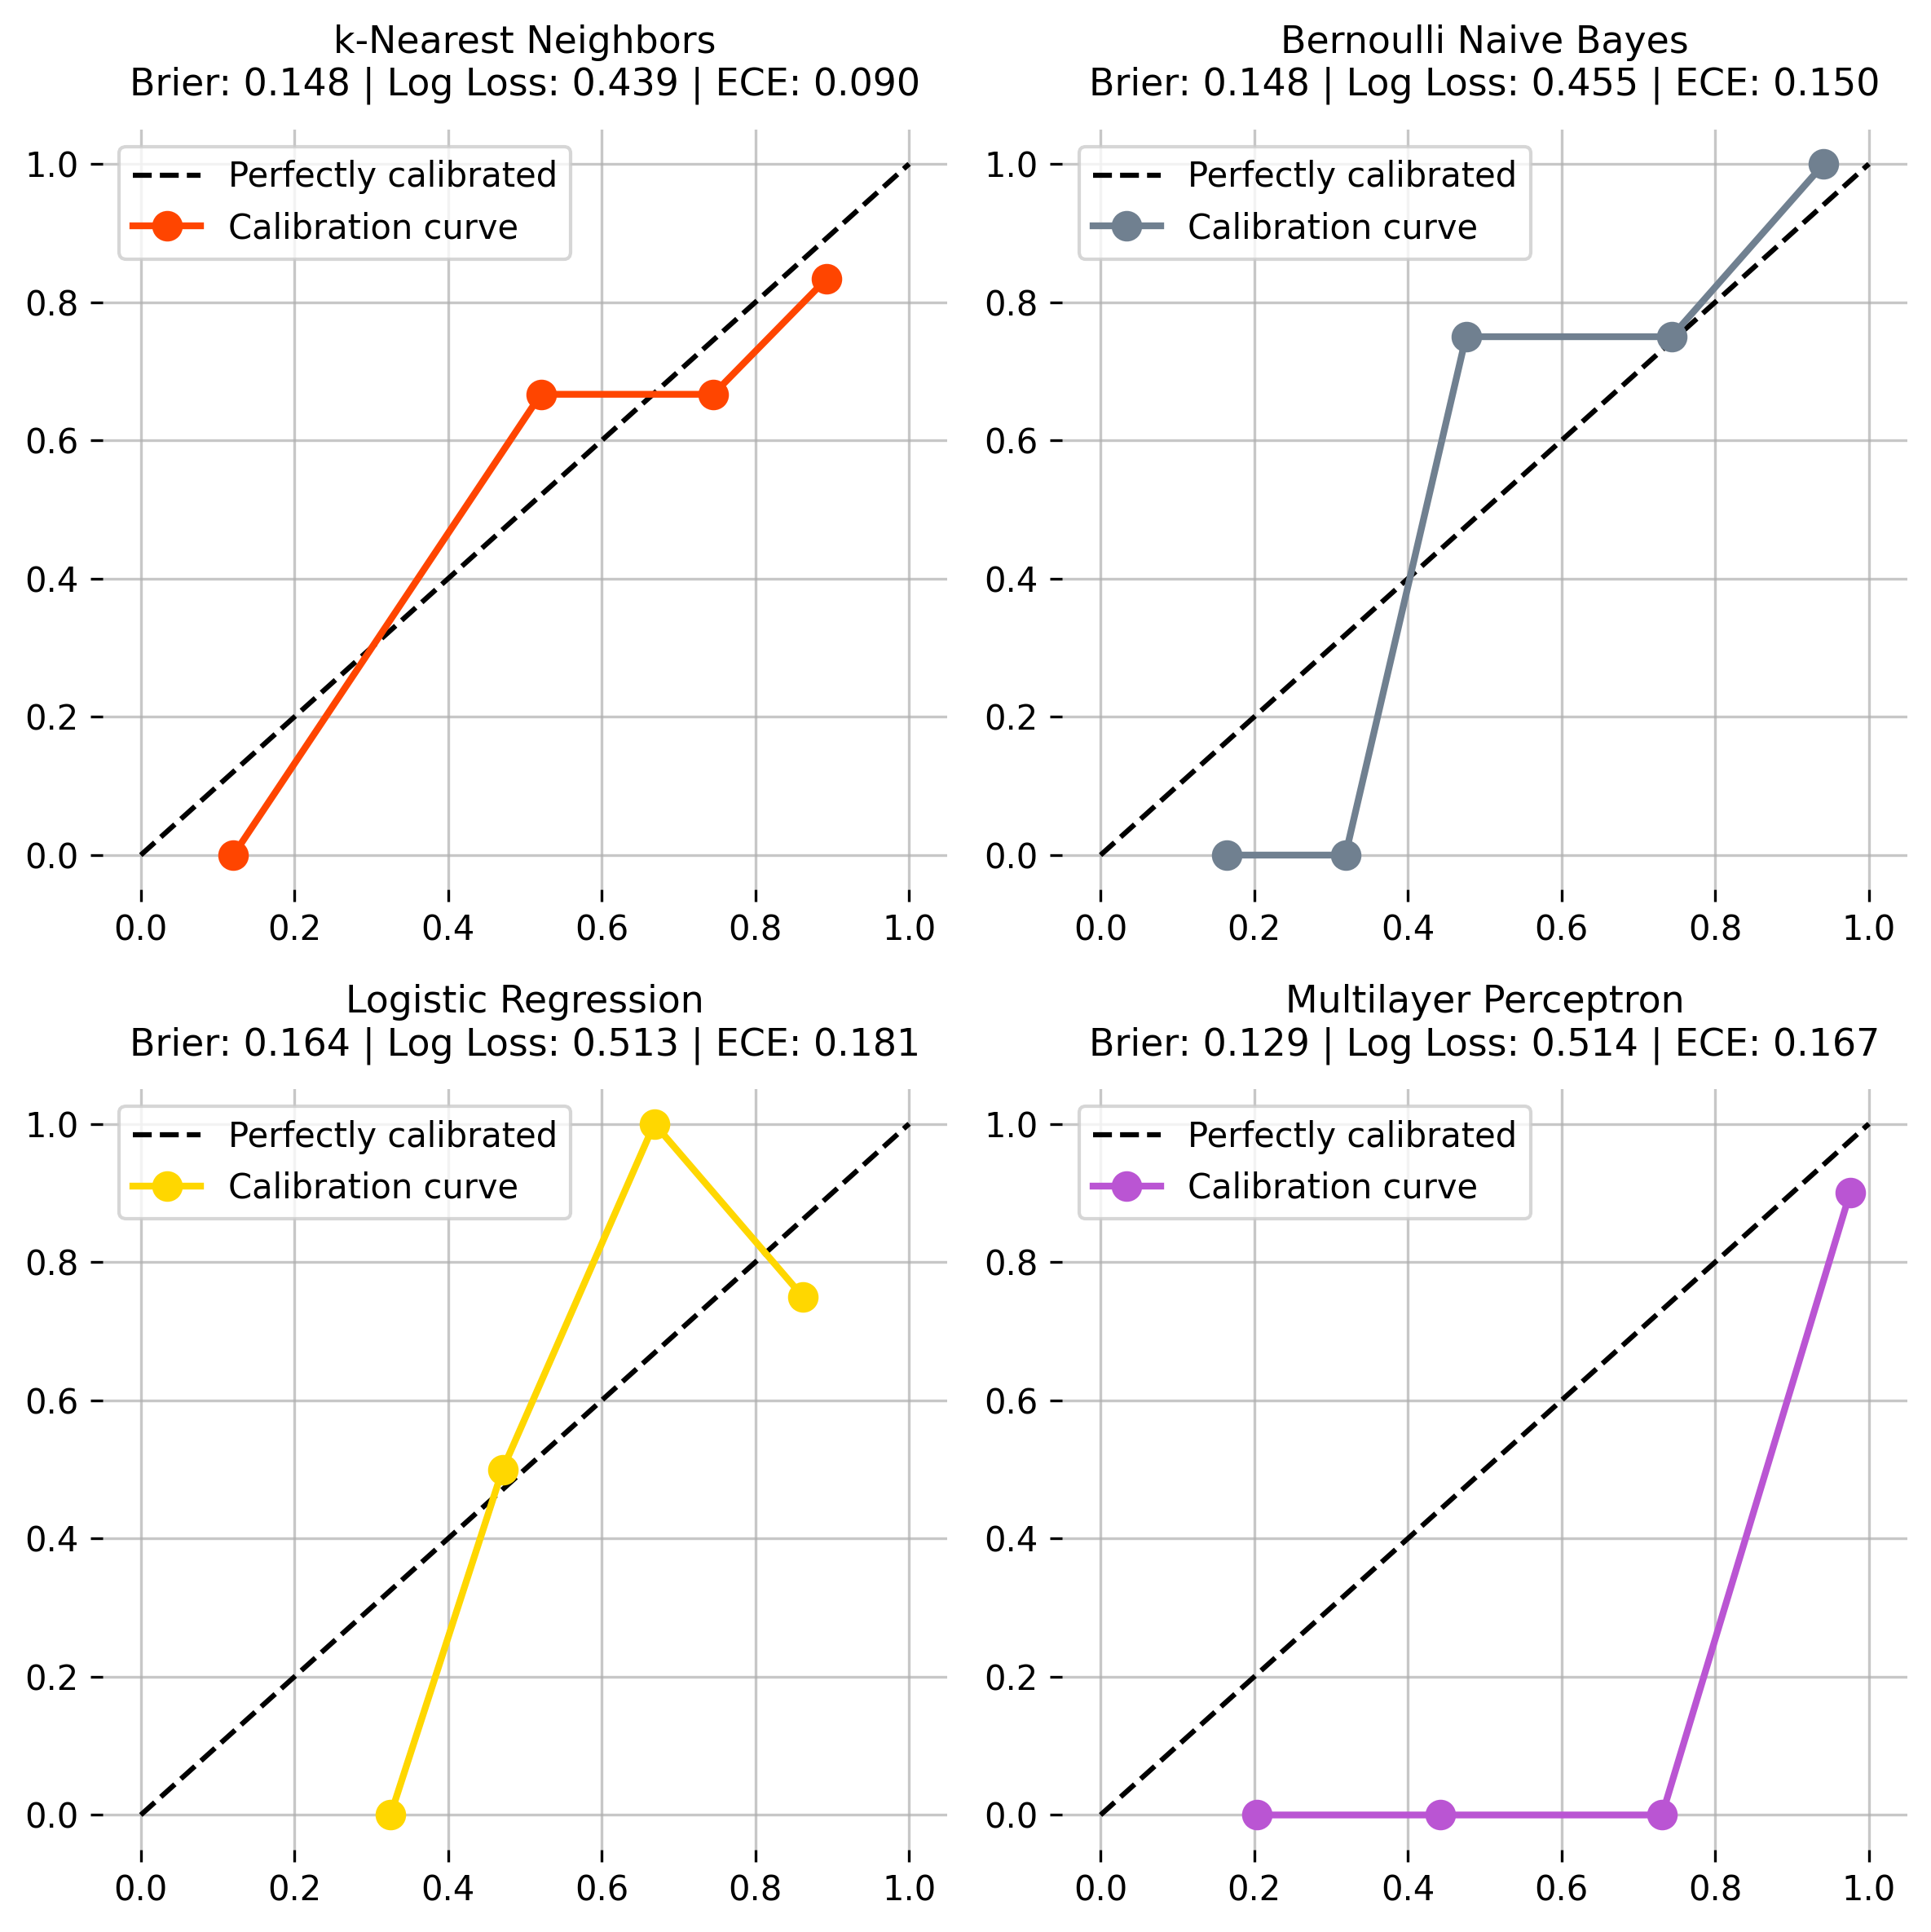

In [4]:
from sklearn.metrics import brier_score_loss, log_loss
from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Define ECE
def calculate_ece(y_true, y_prob, n_bins=5):
    bins = np.linspace(0, 1, n_bins + 1)
    ece = 0
    for bin_lower, bin_upper in zip(bins[:-1], bins[1:]):
        mask = (y_prob >= bin_lower) & (y_prob < bin_upper)
        if np.sum(mask) > 0:
            bin_conf = np.mean(y_prob[mask])
            bin_acc = np.mean(y_true[mask])
            ece += np.abs(bin_conf - bin_acc) * np.sum(mask)
    return ece / len(y_true)

# Initialize models
models = {
    'k-Nearest Neighbors': KNeighborsClassifier(n_neighbors=4, weights='distance'),
    'Bernoulli Naive Bayes': BernoulliNB(),
    'Logistic Regression': LogisticRegression(C=1.5, random_state=42),
    'Multilayer Perceptron': MLPClassifier(hidden_layer_sizes=(4, 2), random_state=42, max_iter=2000)
}

# Get predictions and calculate metrics
metrics_dict = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]
    metrics_dict[name] = {
        'Brier Score': brier_score_loss(y_test, y_prob),
        'Log Loss': log_loss(y_test, y_prob),
        'ECE': calculate_ece(y_test, y_prob),
        'Probabilities': y_prob
    }

# Plot calibration curves
fig, axes = plt.subplots(2, 2, figsize=(8, 8), dpi=300)
colors = ['orangered', 'slategrey', 'gold', 'mediumorchid']

for idx, (name, metrics) in enumerate(metrics_dict.items()):
    ax = axes.ravel()[idx]
    prob_true, prob_pred = calibration_curve(y_test, metrics['Probabilities'], 
                                           n_bins=5, strategy='uniform')
    
    ax.plot([0, 1], [0, 1], 'k--', label='Perfectly calibrated')
    ax.plot(prob_pred, prob_true, color=colors[idx], marker='o', 
            label='Calibration curve', linewidth=2, markersize=8)
    
    title = f'{name}\nBrier: {metrics["Brier Score"]:.3f} | Log Loss: {metrics["Log Loss"]:.3f} | ECE: {metrics["ECE"]:.3f}'
    ax.set_title(title, fontsize=11, pad=10)
    ax.grid(True, alpha=0.7)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.spines[['top', 'right', 'left', 'bottom']].set_visible(False)
    ax.legend(fontsize=10, loc='upper left')

plt.tight_layout()
plt.show()

### Remarks

The **k-Nearest Neighbors (KNN)** model performs well at estimating how certain it should be about its predictions. Its graph line stays close to the dotted line, which shows good performance. It has solid scores — a Brier score of `0.148` and the best ECE score of `0.090`. While it sometimes shows too much confidence in the middle range, it generally makes reliable estimates about its certainty.

The **Bernoulli Naive Bayes** model shows an unusual stair-step pattern in its line. This means it jumps between different levels of certainty instead of changing smoothly. While it has the same Brier score as KNN (`0.148`), its higher ECE of `0.150` shows it’s less accurate at estimating its certainty. The model switches between being too confident and not confident enough.

The **Logistic Regression** model shows clear issues with its predictions. Its line moves far away from the dotted line, meaning it often misjudges how certain it should be. It has the worst ECE score (`0.181`) and a poor Brier score (`0.164`). The model consistently shows too much confidence in its predictions, making it unreliable.

The **Multilayer Perceptron** shows a distinct problem. Despite having the best Brier score (`0.129`), its line reveals that it mostly makes extreme predictions — either very certain or very uncertain, with little in between. Its high ECE (`0.167`) and flat line in the middle ranges show it struggles to make balanced certainty estimates.